# TP 4 Regression logistique avec régularisation
Dans ce TP, nous aimerions faire une classification binaire en utilisant la régression.

Pour ce faire, nous étudierons un ensemble de données avec la variable  (y) representant la commercialisation d'un profuit et les caractéristiques (X) representant les résultat des tests de qualité test 1 et test 2 du produit.

La prédiction se fera avec l'agorithme de descente du gradient avec régularisation.

# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as sklearn


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
data = np.genfromtxt('data.csv', delimiter=',', dtype=float)
data.shape

(118, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente la commercialisation (1 oui 0 non).

Chaque ligne represente un exemple de notre ensemble de données. 

Mettons ces données dans leus vecteurs correspondants.

In [3]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2]

In [4]:
print('X', X.shape ,' y ', y.shape)

X (118, 3)  y  (118,)


# Transformation de données
Dans cette partie, nous aimerions transformer nos données afin d'avoir une fonction polynomiale de degrée 6.

La fonction sera:

$x_0=1$

$x_1=x_1$

$x_2=x_2$

$x_3={x_1}^2$

$x_4={x_1}x_2$

$x_5={x_2}^2$

$x_6={x_1}^3$

$x_7={x_1}^2 x_2$

$x_8= x_1 {x_2}^2$

$x_9= {x_2}^3$

...


Pour un polynme de degrée 6 à 2 variables nous aurons 28 caracteristiques

**Question**: comment avons nous trouvé ce chiffre?

**Astuce**: référez vous aux probabilités

In [5]:
def mapping(X):
    
    cols = 28
    degree=7
    outX= np.ones((X.shape[0],cols))
    X1=X[:,1]
    X2=X[:,2]
    k=0
    for i in range(degree):
        for j in range(i+1):
            outX[:, k] = np.power(X1,i-j)*(np.power(X2,j))
            k=k+1
    return outX    


In [6]:
X2=mapping(X)
X2.shape

(118, 28)

# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [7]:
def Sigmoid(z):
    # pour une valeur donnée, cette fonction calculera sa sigmoid
    return 1/(1+np.exp(-z))
 

In [8]:
k=Sigmoid(-10)
k

4.5397868702434395e-05

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [9]:
def computeCostReg(X, y, theta, lambdaa):
    h = Sigmoid(X.dot(theta))
    #étant donné que nous travaillons avec log, pour eviter les problèmes nous ajoutons ou enlevons une valeur epsilon aux valeurs 0 et 1
    h[h == 0.] += np.finfo(float).eps
    h[h == 1.] -= np.finfo(float).eps
    
    return ( lambdaa * np.sum(np.power(theta[1:],2)) /2 - np.sum(((y * np.log(h)) + ((1-y) * np.log(1-h)))) )/ X.shape[0] 

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [10]:
def gradientDescent(X, y, theta, alpha, lambdaa, iterations):
    # garder aussi le cout à chaque itération 
    # pour afficher le coût en fonction de theta0 et theta1 

    global cost 
    for i in range(iterations):
        cost.append(computeCostReg(X, y.reshape( y.shape[0], 1), theta, lambdaa))
        h = Sigmoid(X.dot(theta))
        theta = theta * (1- alpha * lambdaa / X.shape[0])- (X.T * (h.reshape(h.shape[0]) - y)).sum(axis=1).reshape(X.shape[1], 1) * alpha
        theta[0]-=alpha*(theta[0]*lambdaa)/X.shape[0]
    return theta 

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$ et $\theta_1$

In [11]:
n=X2.shape[1]
theta = np.zeros((n, 1))

Calculer le cout initial

In [12]:
lambdaa = 1
initialCost=computeCostReg(X2, y.reshape( y.shape[0], 1), theta,lambdaa)
print(initialCost)

0.6931471805599454


Appel des la fonction de calcul du gradient

Loss :  0.33711193674575085


Text(0, 0.5, 'Loss')

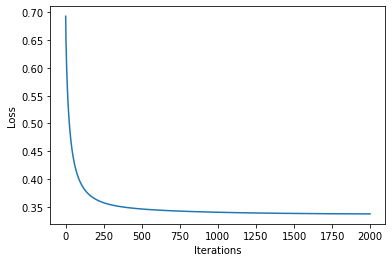

In [13]:
# paramètres
iterations = 2000
alpha = 0.02

# paramètre de regression
lambdaa = 0.012

cost =[]
# Appel
theta = np.zeros((n, 1))
theta = gradientDescent(X2, y, theta, alpha, lambdaa, iterations)

print('Loss : ',cost[-1])
plt.plot(cost)
plt.xlabel('Iterations')
plt.ylabel('Loss')

Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [14]:
def drawCircle(theta, axes):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    U,V = np.meshgrid(u,v)
    #transformer U et V en vecteurs
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    intercept=np.ones((U.shape[0],1))
    x=np.column_stack((intercept,U,V))
    X_poly = mapping(x)
    Z = X_poly.dot(theta)
    
    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = axes.contour(U,V,Z,levels=[0],cmap= "Greys_r")
    axes.legend(labels=['x1', 'x2', 'Decision Boundary'])
    return cs

# Classification (Prédiction)
Ici il serait interessant de calculer la prédiction en utilisant un seuil
i.e. si h>seuil alors classe =1 sinon classe = 0

In [15]:
def predict(X):
    seuil=0.5
    h = Sigmoid(X2.dot(theta))
    h[h >= seuil] = 1
    h[h < seuil] = 0
    y_pred = h.reshape(h.shape[0])
    return y_pred

# Affichage 
Graphe representant les acceptations selon les caracteristiques

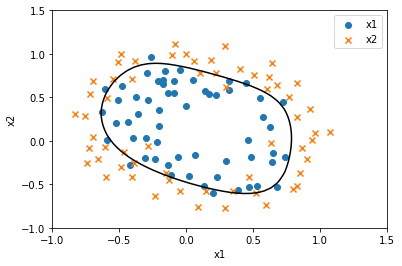

In [16]:
fig, axes = plt.subplots()
axes.set_xlabel('x 1')
axes.set_ylabel('x 2')
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="y=1",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="y=0",marker ='x')
plt.xlabel('x1')
plt.ylabel('x2')
drawCircle(theta,axes)


Traçage du coût en fonction de theta0 et theta1

Loss :  0.33711193674575085


Text(0, 0.5, 'Loss')

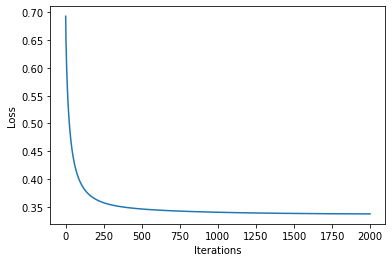

In [17]:
print('Loss : ',cost[-1])
plt.plot(cost)
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Qualité du classifieur

Prédire des valeurs de y

Ici il serait interessant de calculer la précision de notre classifieur

Essayons de calculer ça avec 

moyenne(y==y-pred) * 100

Ceci donnera un pourcentage de precision

In [18]:
# calcul de precision = nombre de valeurs bien prédites (ici sur toute la base X)
y_pred=predict(X)
prcision = np.mean(y==y_pred)*100
print('Precision : ',prcision)

Precision :  83.89830508474576


# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

Precision :  64.40677966101694


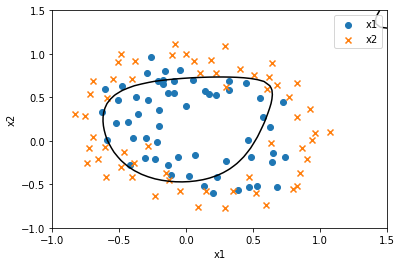

In [19]:
skmodel = sklearn.LogisticRegression(C= 0.0082)
skmodel.fit(X2,y)
sk_predict = skmodel.score(X2,y)
print('Precision : ',sk_predict*100)
fig, axes = plt.subplots()
axes.set_xlabel('x 1')
axes.set_ylabel('x 2')
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="y=1",marker ='o')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="y=0",marker ='x')
plt.xlabel('x1')
plt.ylabel('x2')
drawCircle(skmodel.coef_.T + skmodel.intercept_ ,axes)


# Renforcement d'apprentissage
Mettre ici toute idée qui pourrait renforcer votre apprentissage

# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le vendredi 01 Avril 2022 à 22h


In [20]:
# bonne chance